## Практическая работа: 1 

# Тема: Модель $k$ ближайших соседей

---

### Цель работы

Научиться применять модель $k$ ближайших соседей (kNN) для решения задач классификации и регрессии, познакомиться с основными гиперпараметрами и методами модели.

## Теоретическая справка

**Метод $k$ ближайших соседей** (k-Nearest Neighbors, kNN) — один из простейших алгоритмов машинного обучения, основанный на принципе *«похожие объекты находятся рядом»*. 

Алгоритм относится к классу **метрических методов** и может использоваться как для задач классификации, так и для регрессии.

#### Принцип работы
1. Вычислить расстояние от нового объекта до всех объектов обучающей выборки
2. Выбрать $k$ ближайших соседей (объектов с минимальным расстоянием)
   
**Для классификации:**

3. Присвоить новому объекту класс, который чаще всего встречается среди $k$ соседей (голосование большинством)

**Для регрессии:**

3. Вычислить предсказание как среднее значение целевой переменной соседей:
$$\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i ,$$

где $y_i$ — значение целевой переменной $i$-го соседа.

### Метрики расстояния

Выбор метрики существенно влияет на качество модели. Основные метрики:

| Метрика | Формула | Применение |
|---------|---------|------------|
| **Евклидова** | $d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ | Непрерывные признаки, наиболее распространённая |
| **Манхэттенская** | $d = \sum_{i=1}^{n}|x_i - y_i|$ | Устойчива к выбросам |
| **Минковского** | $d = \left(\sum_{i=1}^{n}|x_i - y_i|^p\right)^{1/p}$ | Обобщение (p=1 — Манхэттенская, p=2 — Евклидова) |
| **Чебышёва** | $d = \max_i |x_i - y_i|$ | Когда важно максимальное отклонение |
| **Хэмминга** | Число несовпадающих позиций | Категориальные/бинарные признаки |

### Взвешивание соседей

По умолчанию все соседи имеют равный вес (`weights='uniform'`). Альтернатива — взвешивание по расстоянию (`weights='distance'`):

$$\hat{y} = \frac{\sum_{i=1}^{k} w_i \cdot y_i}{\sum_{i=1}^{k} w_i}, \quad w_i = \frac{1}{d_i}$$

где $y_i$ — значение целевой переменной $i$-го соседа, $d_i$ — расстояние до $i$-го соседа, $w_i$ — его вес.

Это позволяет более близким соседям сильнее влиять на предсказание.

### Важность масштабирования

⚠️ **Критически важно:** KNN чувствителен к масштабу признаков!

Если один признак измеряется в тысячах (например, доход), а другой — в единицах (возраст), то первый признак будет доминировать при вычислении расстояний.

**Решение:** Масштабируйте данные перед обучением KNN с помощью [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) или [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

**Исключение:** Если в задаче используется только **один признак**, масштабирование не требуется — порядок соседей останется неизменным, так как все расстояния будут умножены на одну и ту же константу.

### Выбор числа соседей k

Число соседей $k$ — ключевой гиперпараметр модели:

- При $k=1$  → переобучение
- При большом $k$  → недообучение

**Подбор k выполняется так:**

1. Разведочный анализ (validation curve) — строим график зависимости ошибки от $k$ на широком диапазоне (например, 1–50).
2. Сужаем диапазон k на основе validation curve по принципу «в пределах одного стандартного отклонения от лучшего результата». Это эвристика «one standard error rule» (правило одного стандартного отклонения).

3. Точный подбор (GridSearchCV) — на суженном диапазоне перебираем комбинации $k$, weights и metric

**Важно:** при использовании Pipeline с префиксом (например, `knn__`) параметры передаются как `knn__n_neighbors`, `knn__weights` и т.д.

### Преимущества и недостатки

| ✅ Преимущества | ❌ Недостатки |
|-----------------|---------------|
| Простота реализации и интерпретации | Медленный на больших данных (O(n) на каждый запрос) |
| Не требует обучения («ленивый» алгоритм) | Чувствителен к масштабу и нерелевантным признакам |
| Естественно поддерживает многоклассовую классификацию | Требует много памяти (хранит всю обучающую выборку) |
| Хорошо работает при достаточном количестве данных | Плохо работает в многомерных пространствах (проклятие размерности) |

### Реализация в Scikit-learn

Основные классы:
- [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) — для классификации
- [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) — для регрессии

**Ключевые параметры:**

| Параметр | Значения | Описание |
|----------|----------|----------|
| `n_neighbors` | int (по умолчанию 5) | Число соседей $k$ |
| `weights` | `'uniform'`, `'distance'` | Схема взвешивания |
| `metric` | `'euclidean'`, `'manhattan'`, `'minkowski'`, ... | Метрика расстояния |
| `p` | int (по умолчанию 2) | Параметр для метрики Минковского |
| `algorithm` | `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` | Алгоритм поиска соседей |

**Параметр `algorithm`** определяет способ поиска ближайших соседей:

| Значение | Суть |
|----------|------|
| `'brute'` | Полный перебор — сравнивает запрос с каждой точкой |
| `'kd_tree'` | Разбивает пространство на прямоугольные области |
| `'ball_tree'` | Разбивает пространство на вложенные сферы |
| `'auto'` | Автоматический выбор (по умолчанию) |

Рекомендации: мало признаков → `kd_tree`, много признаков → `ball_tree`, не знаете → `auto`.

**Основные методы:**
- `fit(X, y)` — «обучение» (запоминание данных)
- `predict(X)` — предсказание для новых объектов
- `kneighbors(X)` — поиск k ближайших соседей (возвращает расстояния и индексы)
- `score(X, y)` — оценка качества (Accuracy для классификации, R² для регрессии)

### Дополнительные ресурсы

- 📖 [Официальная документация sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
- 📖 [User Guide: Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- 📖 [Пример визуализации KNN](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

---
### Импорт библиотек

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

Настраиваем параметры отображения и фиксируем random seed:

In [77]:
plt.rcParams['figure.figsize'] = (6, 4)
np.random.seed(42)

## Классификация
# Задания для выполнения:
В датасете Wine, взять два признака (чтобы иметь возможность визуализировать результаты классификации) с сильно различающимся масштабом.
### План работы:

1. Загрузить и исследовать данные
2. Разделить данные на train/test
3. Масштабировать данные
4. Обучить модель KNN с параметрами по умолчанию
5. Вывести информацию о ближайших соседях
6. Визуализировать соседей
7. Построить validation curve
8. Подобрать гиперпараметры (GridSearchCV)
9. Проанализировать на переобученность
10. Оценить качество на тестовых данных
11. Визуализировать границы решений

---

### Задание 1. Загрузить и исследовать данные

Загрузить встроенный датасет Wine. Взять в качестве признаков $X$ два столбца **alcohol** (содержание спирта, индекс 0) и **proline** (аминокислота пролин, индекс 12), а целевую переменную обозначить как $y$. Вывести признаки вместе с целевой переменной в виде датафрейма. Вывести базовую статистику по признакам (min, max, mean) и определить разницу в масштабах. Определить количество объектов в каждом классе и построить диаграмму рассеяния с цветовой кодировкой классов.

**Указание:** Для загрузки датасета использовать [`load_wine()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). Для определения количества объектов в каждом классе использовать `np.unique(y, return_counts=True)`.

In [78]:
wine = load_wine()

X = wine.data[:, [0, 12]]
y = wine.target


In [79]:
df = pd.DataFrame(X, columns=['alcohol', 'proline'])
df['target'] = y
df.describe().loc[['min', 'max', 'mean']]

,alcohol,proline,target
min,11.030000,278.000000,0.000000
max,14.830000,1680.000000,2.000000
mean,13.000618,746.893258,0.938202


In [80]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

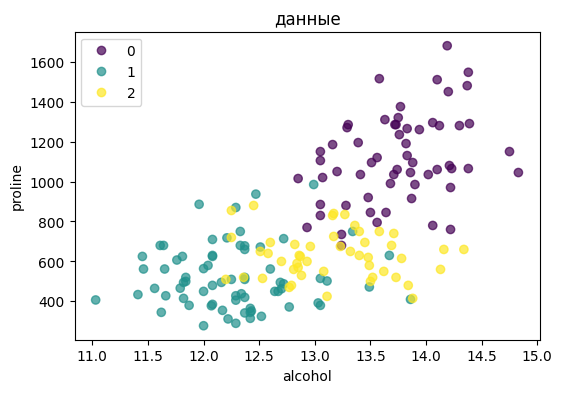

In [81]:
a = plt.scatter(X[:,0],X[:,1],alpha = 0.7,c=y)
plt.title('данные')
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.legend(*a.legend_elements(),loc = 'upper left')
plt.show()

---
### Задание 2. Разделить данные на train/test

Разделить данные на обучающую и тестовую выборки в соотношении 80/20 с сохранением пропорций классов (стратификация). Зафиксировать `random_state=42` для воспроизводимости. Вывести размеры полученных выборок и распределение классов. Визуализировать обучающие и тестовые данные на двух диаграммах рассеивания (подкрасив классы разными цветами) в одной области, чтобы убедиться в репрезентативности разбиения.

**Указание:** Использовать [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `stratify=y`.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train[:5]

array([[  13.28,  880.  ],
       [  13.73, 1285.  ],
       [  13.39, 1195.  ],
       [  13.75, 1320.  ],
       [  13.32,  650.  ]])

In [83]:
X_train.shape[0],X_test.shape[0]

(142, 36)

In [84]:
pd.Series(y_train).value_counts()

1    57
0    47
2    38
Name: count, dtype: int64

In [85]:
pd.Series(y_test).value_counts()

1    14
0    12
2    10
Name: count, dtype: int64

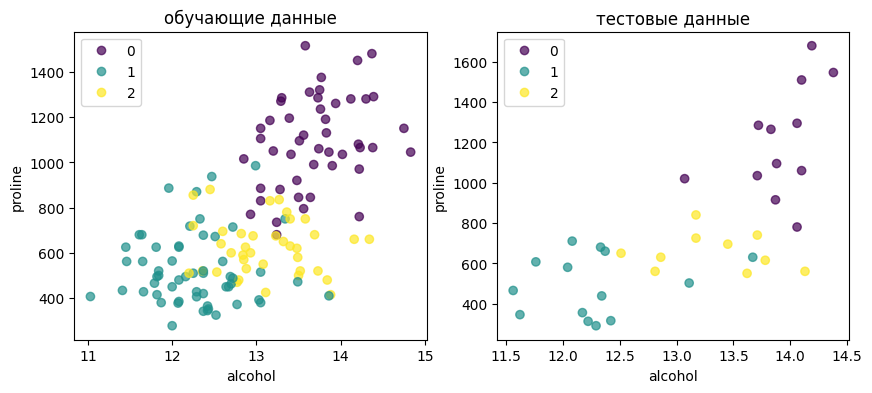

In [86]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
a = plt.scatter(X_train[:,0],X_train[:,1],alpha = 0.7,c=y_train)
plt.title('обучающие данные')
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.legend(*a.legend_elements(),loc = 'upper left')

plt.subplot(1,2,2)
a = plt.scatter(X_test[:,0],X_test[:,1],alpha = 0.7,c=y_test)
plt.title('тестовые данные')
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.legend(*a.legend_elements(),loc = 'upper left')
plt.show()

---
### Задание 3. Масштабировать данные

Масштабировать данные с помощью `StandardScaler`. Масштабирование необходимо, поскольку KNN чувствителен к масштабу признаков.

**Указание:** Использовать [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Важно: `.fit_transform()` применяется только к обучающей выборке, а `.transform()` — к тестовой, чтобы избежать "утечки" данных.

In [87]:
scaller = StandardScaler()
X_train_scaller = scaller.fit_transform(X_train)
X_test_scaller = scaller.transform(X_test)
X_train[:5]

array([[  13.28,  880.  ],
       [  13.73, 1285.  ],
       [  13.39, 1195.  ],
       [  13.75, 1320.  ],
       [  13.32,  650.  ]])

In [88]:
X_train_scaller[:5]

array([[ 0.38580089,  0.46772474],
       [ 0.94851892,  1.81576773],
       [ 0.52335419,  1.51620262],
       [ 0.97352861,  1.93226527],
       [ 0.43582027, -0.29783054]])

---
### Задание 4. Обучить модель с параметрами по умолчанию

Создать модель KNN с параметрами по умолчанию и вывести значения параметров. Вывести документацию по параметрам. Обучить модель на масштабированных обучающих данных. Оценить качество построенной модели на тестовых данных. Для этого построить матрицу ошибок (confusion matrix) на тепловой карте и вывести отчёт о классификации.

**Указание:** Использовать метод `get_params()` для просмотра текущих (defaults) параметров модели и `print(KNeighborsClassifier.__doc__)` для вывода документации по параметрам. 

In [89]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [90]:
print(KNeighborsClassifier.__doc__)

Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'}, callable or None, default='uniform'
        Weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

        Refer to the example entitled
        :ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`
        showing th

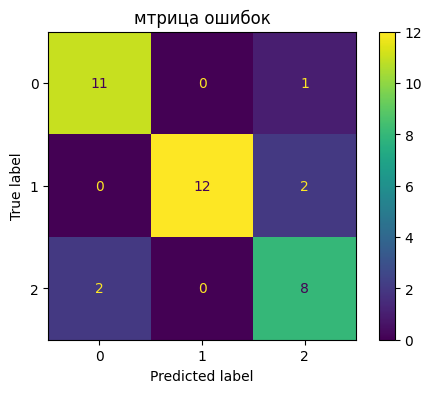

In [91]:
knn.fit(X_train_scaller,y_train)
y_test_pred = knn.predict(X_test_scaller)

cm=confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('мтрица ошибок')
plt.show()

### Задание 5. Вывести информацию о ближайших соседях

Для первого масштабированного тестового наблюдения вывести следующую информацию о его ближайших соседях: индексы, координаты и расстояния до них.

**Указание:** Использовать метод [`kneighbors()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors) для поиска соседей.

In [92]:
test_point = np.array([X_test_scaller[0]])
test_point


array([[1.41119819, 2.5646805 ]])

In [93]:
distances, indexes = knn.kneighbors(test_point)

In [94]:
neighbors = X_train_scaller[indexes[0]]
neighbors

array([[1.53624664, 2.36497043],
       [1.748829  , 2.46482547],
       [0.9985383 , 2.11533284],
       [0.76094624, 2.58132301],
       [1.43620788, 1.79912523]])

---
### Задание 6. Визуализировать соседей

Визуализировать первое масштабированное тестовое наблюдение и его ближайших соседей на диаграмме рассеяния масштабированных обучающих данных с цветовой кодировкой классов. Выделить его особым маркером, обвести найденных соседей  красным цветом. По графику определите к какому классу должно быть отнесено первое масштабированное тестовое наблюдение. Выведите его метку класса, используя метод predict.

**Указание:** Использовать `plt.scatter()` с разными параметрами для обучающих данных, тестовой точки и соседей. Линии можно провести с помощью `plt.plot()`.

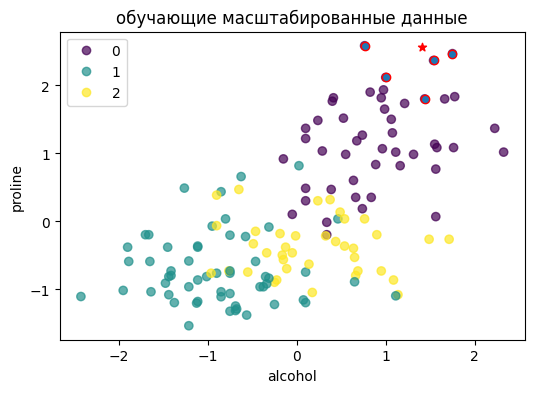

In [95]:
a = plt.scatter(X_train_scaller[:,0],X_train_scaller[:,1],alpha = 0.7,c=y_train)
plt.scatter(test_point[0,0],test_point[0,1],marker = '*',c = 'red')
plt.title('обучающие масштабированные данные')
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.legend(*a.legend_elements(),loc = 'upper left')

plt.scatter(neighbors[:,0],neighbors[:,1],edgecolors = 'red')
plt.show()

---
### Задание 7. Построить validation curve

Построить кривую валидации (validation curve) для параметра `n_neighbors`, чтобы определить оптимальный диапазон k для GridSearchCV по принципу «в пределах одного стандартного отклонения от лучшего результата».

**Указание:** Использовать [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) из sklearn по метрике `f1_weighted`. Диапазон k для исследования взять от 1 до 50.

Диапазон k для GridSearchCV: 3–50


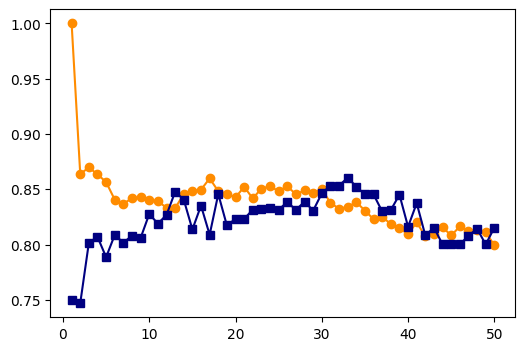

In [96]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

k_range = np.arange(1, 51)

train_scores, cv_scores = validation_curve(
    pipe, X_train, y_train,
    param_name='knn__n_neighbors',
    param_range=k_range,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
cv_mean = cv_scores.mean(axis=1)

plt.plot(k_range, train_mean, 'o-', color='darkorange', label='Train')
plt.plot(k_range, cv_mean, 's-', color='navy', label='Validation')

best_k_vc = k_range[np.argmax(cv_mean)]
best_cv = cv_mean.max()
cv_std = cv_scores.std(axis=1)

good_k = k_range[cv_mean >= best_cv - cv_std[np.argmax(cv_mean)]]

k_min = good_k.min()
k_max = good_k.max()

print(f"Диапазон k для GridSearchCV: {k_min}–{k_max}")

---
### Задание 8. Подобрать гиперпараметры (GridSearchCV)

Использовать `GridSearchCV` для автоматического подбора оптимальных гиперпараметров модели KNN.

**Требования к сетке гиперпараметров:**
- `n_neighbors`: суженный диапазон из validation curve
- `weights`: перебрать `uniform` и `distance`
- `metric`: перебрать основные метрики расстояния

**Указание:** Использовать `return_train_score=True` для последующего анализа переобучения.

In [97]:
print(f"Диапазон k из validation curve: {k_min}–{k_max}")

Диапазон k из validation curve: 3–50


In [98]:
param_grid = {
    'knn__n_neighbors': list(range(k_min, k_max + 1)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

total = len(param_grid['knn__n_neighbors']) * len(param_grid['knn__weights']) * len(param_grid['knn__metric'])
print(f"Всего комбинаций: {total}")

Всего комбинаций: 288


In [99]:
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    return_train_score=True
)

In [100]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19, 20,
                                              21, 22, 23, 24, 25, 26, 27, 28,
                                              29, 30, 31, 32, ...],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1_weighted')

In [101]:
grid_search.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 33, 'knn__weights': 'uniform'}

In [102]:
results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
display(results[['param_knn__n_neighbors', 'param_knn__weights', 'param_knn__metric', 'mean_test_score']].head())

,param_knn__n_neighbors,param_knn__weights,param_knn__metric,mean_test_score
252,33,uniform,minkowski,0.860451
60,33,uniform,euclidean,0.860451
56,31,uniform,euclidean,0.853255
58,32,uniform,euclidean,0.853255
250,32,uniform,minkowski,0.853255


---
### Задание 9. Проанализировать на переобученность

Проанализировать результаты GridSearchCV на предмет переобучения, для этого сравнить Train F1 и CV F1 для лучшей модели.

**Указание:** Использовать критерий: Train F1 − CV F1 < 5% - переобучения нет.

In [103]:
train_score_best = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
cv_score_best = grid_search.best_score_

print(f"   Train F1: {train_score_best:.4f}")
print(f"   CV F1:    {cv_score_best:.4f}")

   Train F1: 0.8340
   CV F1:    0.8605


In [104]:
overfit_best = train_score_best - cv_score_best
f"   Разница:  {overfit_best:.4f} ({overfit_best*100:.1f}%)"

'   Разница:  -0.0265 (-2.6%)'

In [105]:
is_overfitting = overfit_best > 0.05

if is_overfitting:
    print("Переобучение: разница > 5%")
else:
    print("Переобучения нет")

Переобучения нет


---
### Задание 10. Оценить качество на тестовых данных

Оценить качество лучшей модели из GridSearchCV на тестовых данных. Для этого построить матрицу ошибок (confusion matrix) на тепловой карте и вывести отчёт о классификации. Сравнить с моделью по умолчанию по метрике F1-score с весовым усреднением.

**Важно:** Тестовую выборку использовать только один раз для финальной оценки!

In [106]:
best_model = grid_search.best_estimator_

In [107]:
y_test_pred = best_model.predict(X_test)

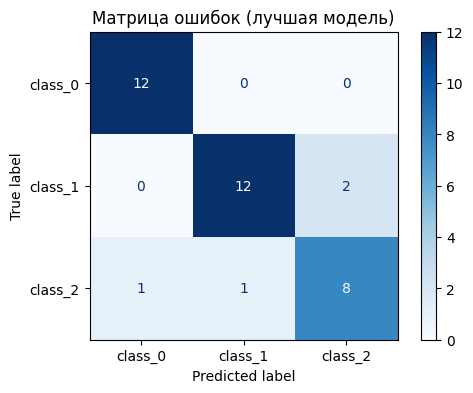

In [108]:
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names).plot(cmap='Blues')
plt.title('Матрица ошибок (лучшая модель)')
plt.show()

In [109]:
print(classification_report(y_test, y_test_pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.92      0.86      0.89        14
     class_2       0.80      0.80      0.80        10

    accuracy                           0.89        36
   macro avg       0.88      0.89      0.88        36
weighted avg       0.89      0.89      0.89        36



In [110]:
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
default_f1 = f1_score(y_test, knn.predict(X_test), average='weighted')
print(f"   Модель по умолчанию (k=5): F1 = {default_f1:.4f}")
print(f"   Лучшая модель (k={grid_search.best_params_['knn__n_neighbors']}): F1 = {test_f1:.4f}")
print(f"   Улучшение: {test_f1 - default_f1:+.4f} ({(test_f1 - default_f1)*100:+.1f}%)")

   Модель по умолчанию (k=5): F1 = 0.1667
   Лучшая модель (k=33): F1 = 0.8879
   Улучшение: +0.7212 (+72.1%)


---
### Задание 11. Визуализировать границы решений

Визуализировать границы решений (decision boundaries) лучшей модели в масштабированном пространстве обучающих данных на одном графике с диаграммами рассеяния обучающих и тестовых данных с цветовой кодировкой классов.

**Указание:** Использовать `np.meshgrid()` для создания сетки и `plt.contourf()` для отображения границ.

In [111]:
scaler = best_model.named_steps['scaler']
X_train_scaled = scaler.transform(X_train)

In [112]:
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

knn_model = best_model.named_steps['knn']
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_model.predict(grid_points).reshape(xx.shape)



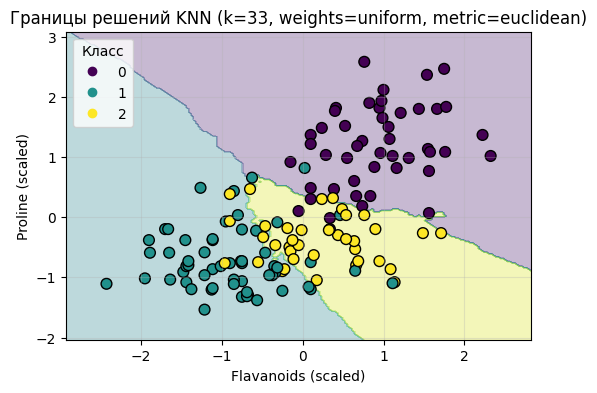

In [113]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

scatter = plt.scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1], 
    c=y_train, cmap='viridis', 
    edgecolors='k', s=60
)

plt.xlabel('Flavanoids (scaled)')
plt.ylabel('Proline (scaled)')

best_k = grid_search.best_params_['knn__n_neighbors']
best_weights = grid_search.best_params_['knn__weights']
best_metric = grid_search.best_params_['knn__metric']

plt.title(f'Границы решений KNN (k={best_k}, weights={best_weights}, metric={best_metric})')
plt.legend(*scatter.legend_elements(), title='Класс', loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Задания для самостоятельного выполнения:
Сгенерировать синтетические данные для задачи регрессии с одним признаком (чтобы иметь возможность визуализировать результаты регрессии).

### План работы

1. Сгенерировать и исследовать данные
2. Разделить данные на train/test
3. Обучить модель KNN с параметрами по умолчанию
4. Вывести информацию о ближайших соседях
5. Визуализировать соседей
6. Построить validation curve
7. Подобрать гиперпараметры (GridSearchCV)
8. Проанализировать на переобученность
9. Оценить качество на тестовых данных
10. Визуализировать предсказания

**Важно:** При работе с одним признаком масштабирование не требуется, так как порядок соседей не изменится.

---

### Задание 1. Сгенерировать и исследовать данные

Сгенерировать синтетические данные для задачи регрессии с одним признаком, состоящим из 200 точек, равномерно взятых на интервале [-1, 3] и целевой переменной $y = x^2 + \varepsilon$, где $\varepsilon \sim N(0, 1)$. Вывести размер данных и базовую статистику. Визуализировать данные вместе с истинной функцией $y = x^2$.

**Указание:** Использовать `np.linspace()` для генерации равномерной сетки точек и `np.random.randn()` для добавления шума.

In [114]:
X = np.linspace(-1, 3, 200).reshape(-1, 1)
y = X.ravel()**2 + np.random.randn(200)

In [115]:
X.shape

(200, 1)

In [116]:
print(X.min(),X.max(),X.mean())

-1.0 3.0 1.0000000000000002


In [117]:
print(y.min(),y.max(),y.mean())

-2.38215009386273 9.469720945585099 2.305962703169624


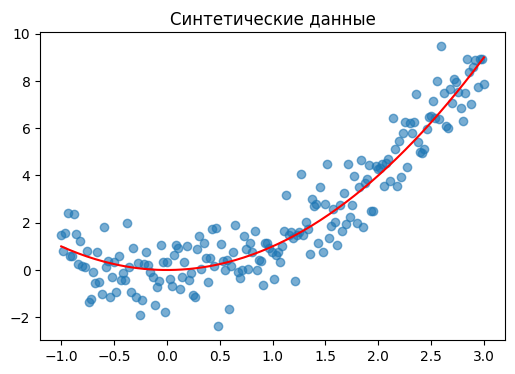

In [118]:
plt.scatter(X, y, alpha=0.6)
plt.plot(X, X**2,color = 'red')
plt.title('Синтетические данные')
plt.show()

---
### Задание 2. Разделить данные на train/test

Разделить данные на обучающую и тестовую выборки в соотношении 80/20. Зафиксировать `random_state=42` для воспроизводимости. Вывести размеры полученных выборок. Визуализировать обучающие и тестовые данные на одном графике с истинной функцией, подкрасив их разным цветом.

**Указание:** Использовать [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [120]:
X_train.shape,X_test.shape

((160, 1), (40, 1))

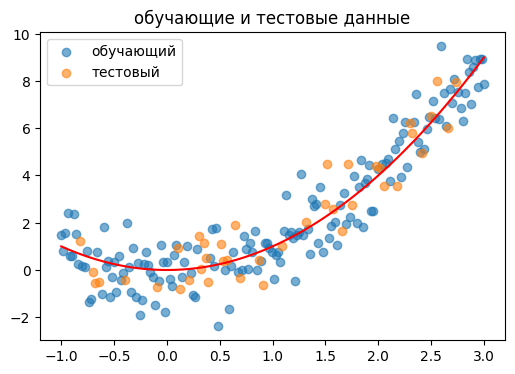

In [121]:
plt.scatter(X_train, y_train, alpha=0.6, label='обучающий')
plt.scatter(X_test, y_test, alpha=0.6, label='тестовый')
plt.plot(X, X**2,color = 'red')
plt.legend()
plt.title('обучающие и тестовые данные')
plt.show()

---
### Задание 3. Обучить модель с параметрами по умолчанию

Создать модель KNN для регрессии с параметрами по умолчанию и вывести значения параметров. Обучить модель на обучающих данных. Оценить качество модели на тестовых данных по метрикам R² и RMSE.

**Указание:** Использовать класс [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) и метод `get_params()` для просмотра параметров.

In [122]:
model_knn = KNeighborsRegressor()
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [123]:
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [124]:
r2 = r2_score(y_test, y_pred)
r2

0.8422026545878525

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.0104237492167705


---
### Задание 4. Вывести информацию о ближайших соседях

Для первого тестового наблюдения вывести следующую информацию о его ближайших соседях: индексы, координаты x, значения y и расстояния до них. Вычислить предсказание вручную и сравнить с результатом модели.

**Указание:** Использовать метод [`kneighbors()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors) для поиска соседей.

In [126]:
distances, indices = model_knn.kneighbors(X_test[0].reshape(-1, 1))
print(f"Индексы соседей: {indices[0]}")
print(f"Расстояния: {distances[0]}")
print(f"Значения y соседей: {y_train[indices[0]]}")
print(f"Расстояния до {model_knn.n_neighbors} ближайших соседей: {distances[0]}")
print(f"Предсказание модели: {model_knn.predict(X_test[0].reshape(-1, 1))[0]}")
print(f"Ручной расчет : {y_train[indices[0]].mean()}")

Индексы соседей: [ 19  92  21 157  17]
Расстояния: [0.0201005  0.0201005  0.04020101 0.06030151 0.06030151]
Значения y соседей: [1.16036613 0.39900823 1.16307795 0.01916607 0.94572102]
Расстояния до 5 ближайших соседей: [0.0201005  0.0201005  0.04020101 0.06030151 0.06030151]
Предсказание модели: 0.7374678789894424
Ручной расчет : 0.7374678789894424


---
### Задание 5. Визуализировать соседей

Визуализировать первое тестовое наблюдение и её ближайших соседей на диаграмме рассеяния обучающих данных. Выделить это наблюдение особым маркером, обвести найденных соседей красным цветом.

**Указание:** Использовать `plt.scatter()` с разными параметрами для обучающих данных, точки запроса и соседей.

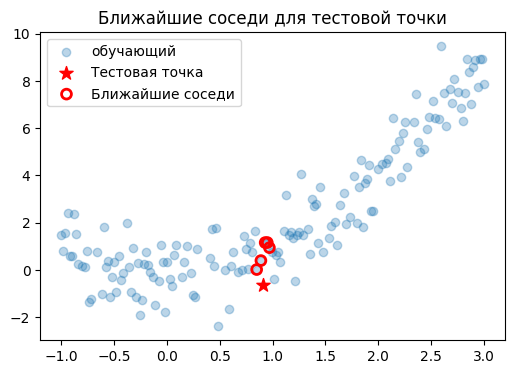

In [127]:
plt.scatter(X_train, y_train, alpha=0.3, label='обучающий')
plt.scatter(X_test[0], y_test[0], color='red', s=100, marker='*', label='Тестовая точка')

plt.scatter(X_train[indices[0]], y_train[indices[0]], color='red', s=50, edgecolors='red', linewidth=2, facecolors='none', label='Ближайшие соседи')
plt.legend()
plt.title('Ближайшие соседи для тестовой точки')
plt.show()

---
### Задание 6. Построить validation curve

Построить кривую валидации (validation curve) для параметра `n_neighbors`, чтобы определить оптимальный диапазон k для GridSearchCV.

**Указание:** Использовать [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) из sklearn. Использовать `scoring='neg_mean_squared_error'`.

In [128]:
k_range = np.arange(1, 51)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [129]:
k_range = np.arange(1, 51)
train_scores, cv_scores = validation_curve(
    KNeighborsRegressor(), X_train, y_train,
    param_name='n_neighbors',
    param_range=k_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [130]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
cv_mean = cv_scores.mean(axis=1)
cv_std = cv_scores.std(axis=1)

In [131]:
best_k_vc = k_range[np.argmax(cv_mean)]
best_cv = cv_mean.max()

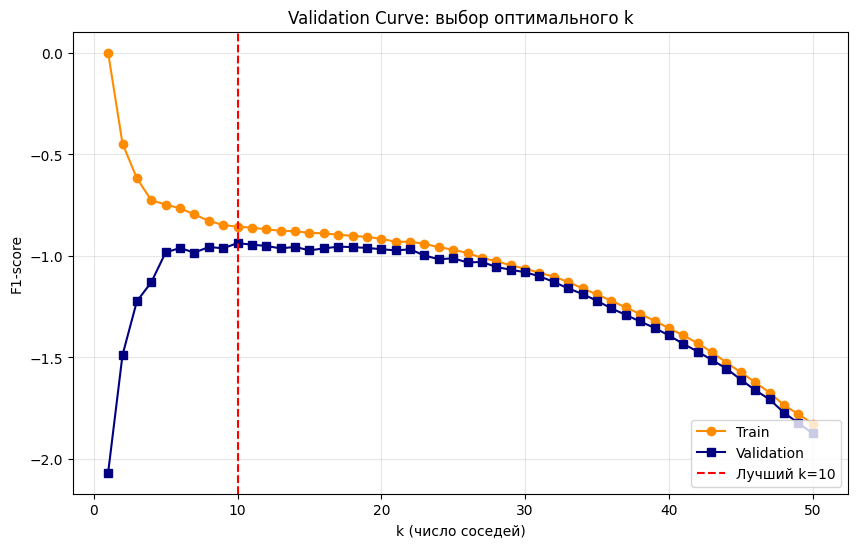

In [132]:
plt.figure(figsize=(10, 6))

plt.plot(k_range, train_mean, 'o-', color='darkorange', label='Train')
#plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='darkorange')

plt.plot(k_range, cv_mean, 's-', color='navy', label='Validation')
#plt.fill_between(k_range, cv_mean - cv_std, cv_mean + cv_std, alpha=0.2, color='navy')

# Отмечаем лучший k
plt.axvline(best_k_vc, color='red', linestyle='--', label=f'Лучший k={best_k_vc}')

plt.xlabel('k (число соседей)')
plt.ylabel('F1-score')
plt.title('Validation Curve: выбор оптимального k')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

---
### Задание 7. Подобрать гиперпараметры (GridSearchCV)

Использовать `GridSearchCV` для автоматического подбора оптимальных гиперпараметров модели KNN.

**Требования к сетке гиперпараметров:**
- `n_neighbors`: суженный диапазон из validation curve
- `weights`: перебрать `uniform` и `distance`

**Указание:** Использовать `return_train_score=True` для последующего анализа переобучения.

In [133]:
k_min_grid = good_k.min()
k_max_grid = good_k.max()
print(f"Диапазон k из validation curve: {k_min_grid}–{k_max_grid}")

Диапазон k из validation curve: 3–50


In [134]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [135]:
param_grid = {
    'knn__n_neighbors': list(range(k_min_grid, k_max_grid + 1)),
    'knn__weights': ['uniform', 'distance']
}

total = len(param_grid['knn__n_neighbors']) * len(param_grid['knn__weights'])
print(f"Всего комбинаций: {total}")

Всего комбинаций: 96


In [136]:
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # для регрессии
    n_jobs=-1,
    return_train_score=True
)

In [137]:
grid_search.fit(X_train, y_train)
print("✓ GridSearchCV завершён")

✓ GridSearchCV завершён


In [138]:
grid_search.best_params_

{'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

In [139]:
results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
display(results[['param_knn__n_neighbors', 'param_knn__weights', 'mean_test_score']].head(5))

,param_knn__n_neighbors,param_knn__weights,mean_test_score
16,11,uniform,-0.934457
14,10,uniform,-0.944328
22,14,uniform,-0.950509
10,8,uniform,-0.950590
18,12,uniform,-0.952074


---
### Задание 8. Проанализировать на переобученность

Проанализировать результаты GridSearchCV на предмет переобучения. Сравнить Train MSE и CV MSE из `cv_results_` для лучшей модели.

**Указание**: Проверяем критерий переобучения: CV MSE < Train MSE × 1.5 - переобучения нет.

In [145]:
train_mse = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
cv_mse = -grid_search.cv_results_['mean_test_score'][grid_search.best_index_]

print(f"Train MSE: {train_mse:.4f}")
print(f"CV MSE: {cv_mse:.4f}")
print(f"Переобучение: {'Нет' if cv_mse < train_mse * 1.5 else 'Да'}")

Train MSE: 0.8580
CV MSE: 0.9345
Переобучение: Нет


---
### Задание 9. Оценить качество на тестовых данных

Оценить качество лучшей модели из GridSearchCV на тестовых данных. Вычислить R² и RMSE. Сравнить с моделью по умолчанию по метрике R².

In [146]:
best_model = grid_search.best_estimator_

In [147]:
y_pred_best = best_model.predict(X_test)

In [148]:
r2_best = r2_score(y_test, y_pred_best)
r2_best

0.8810374194426474

In [149]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(rmse)

0.8773217316757294


In [150]:
r2_default = r2_score(y_test, y_pred)
r2_default

0.8422026545878525

---
### Задание 10. Визуализировать предсказания

Визуализировать предсказания финальной модели на всем диапазоне данных. Построить на одном графике кривую предсказаний, диаграмму рассеяния обучающих и тестовых данных и истинную зависимость $y = x^2$.

**Указание:** Создать плотную сетку в диапазоне данных с помощью `np.linspace()` для построения гладкой кривой предсказаний.

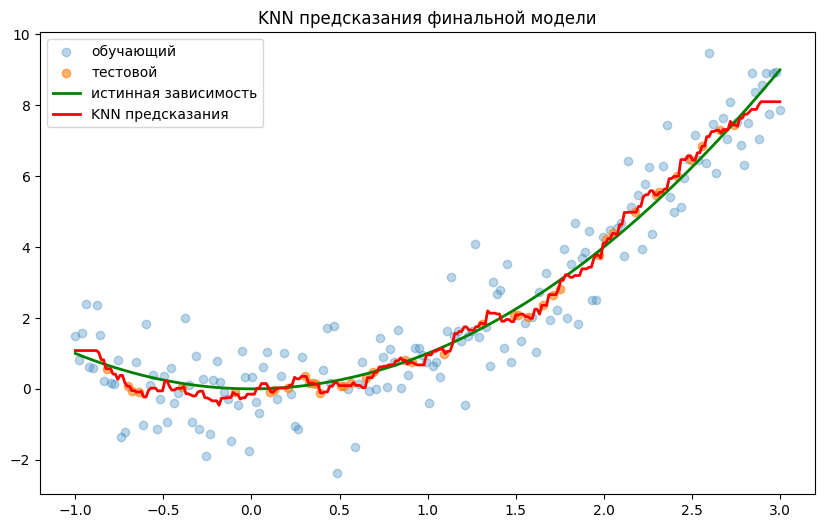

In [151]:
X_grid = np.linspace(-1, 3, 300).reshape(-1, 1)
y_grid_pred = best_model.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='обучающий')
plt.scatter(X_test, y_pred_best, alpha=0.6, label='тестовой')
plt.plot(X_grid, X_grid**2, 'g-', linewidth=2, label='истинная зависимость')
plt.plot(X_grid, y_grid_pred, 'r-', linewidth=2, label='KNN предсказания')
plt.legend()
plt.title('KNN предсказания финальной модели')
plt.show()

### Задание 1. Сгенерировать и исследовать данные

Сгенерировать синтетические данные для задачи регрессии с одним признаком, состоящим из 200 точек, равномерно взятых на интервале [-1, 3] и целевой переменной $y = x^2 + \varepsilon$, где $\varepsilon \sim N(0, 1)$. Вывести размер данных и базовую статистику. Визуализировать данные вместе с истинной функцией $y = x^2$.

**Указание:** Использовать `np.linspace()` для генерации равномерной сетки точек и `np.random.randn()` для добавления шума.

---
### Задание 2. Разделить данные на train/test

Разделить данные на обучающую и тестовую выборки в соотношении 80/20. Зафиксировать `random_state=42` для воспроизводимости. Вывести размеры полученных выборок. Визуализировать обучающие и тестовые данные на одном графике с истинной функцией, подкрасив их разным цветом.

**Указание:** Использовать [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

---
### Задание 3. Обучить модель с параметрами по умолчанию

Создать модель KNN для регрессии с параметрами по умолчанию и вывести значения параметров. Обучить модель на обучающих данных. Оценить качество модели на тестовых данных по метрикам R² и RMSE.

**Указание:** Использовать класс [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) и метод `get_params()` для просмотра параметров.

---
### Задание 4. Вывести информацию о ближайших соседях

Для первого тестового наблюдения вывести следующую информацию о его ближайших соседях: индексы, координаты x, значения y и расстояния до них. Вычислить предсказание вручную и сравнить с результатом модели.

**Указание:** Использовать метод [`kneighbors()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors) для поиска соседей.

---
### Задание 5. Визуализировать соседей

Визуализировать первое тестовое наблюдение и её ближайших соседей на диаграмме рассеяния обучающих данных. Выделить это наблюдение особым маркером, обвести найденных соседей красным цветом.

**Указание:** Использовать `plt.scatter()` с разными параметрами для обучающих данных, точки запроса и соседей.

---
### Задание 6. Построить validation curve

Построить кривую валидации (validation curve) для параметра `n_neighbors`, чтобы определить оптимальный диапазон k для GridSearchCV.

**Указание:** Использовать [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) из sklearn. Использовать `scoring='neg_mean_squared_error'`.

---
### Задание 7. Подобрать гиперпараметры (GridSearchCV)

Использовать `GridSearchCV` для автоматического подбора оптимальных гиперпараметров модели KNN.

**Требования к сетке гиперпараметров:**
- `n_neighbors`: суженный диапазон из validation curve
- `weights`: перебрать `uniform` и `distance`

**Указание:** Использовать `return_train_score=True` для последующего анализа переобучения.

---
### Задание 8. Проанализировать на переобученность

Проанализировать результаты GridSearchCV на предмет переобучения. Сравнить Train MSE и CV MSE из `cv_results_` для лучшей модели.

**Указание**: Проверяем критерий переобучения: CV MSE < Train MSE × 1.5 - переобучения нет.

---
### Задание 9. Оценить качество на тестовых данных

Оценить качество лучшей модели из GridSearchCV на тестовых данных. Вычислить R² и RMSE. Сравнить с моделью по умолчанию по метрике R².

---
### Задание 10. Визуализировать предсказания

Визуализировать предсказания финальной модели на всем диапазоне данных. Построить на одном графике кривую предсказаний, диаграмму рассеяния обучающих и тестовых данных и истинную зависимость $y = x^2$.

**Указание:** Создать плотную сетку в диапазоне данных с помощью `np.linspace()` для построения гладкой кривой предсказаний.